In [109]:
from tensorflow import keras, nn

import matplotlib.pyplot as plt
import numpy as np

## Data

In [110]:
dataset = keras.datasets.fashion_mnist

In [111]:
train_data, test_data = dataset.load_data()

In [112]:
X_train, y_train = train_data
X_test, y_test = test_data

In [113]:
len(X_train)

60000

In [114]:
len(X_test)

10000

In [115]:
label_dict = {
    0:	'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover', 
    3:	'Dress', 
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot'
}

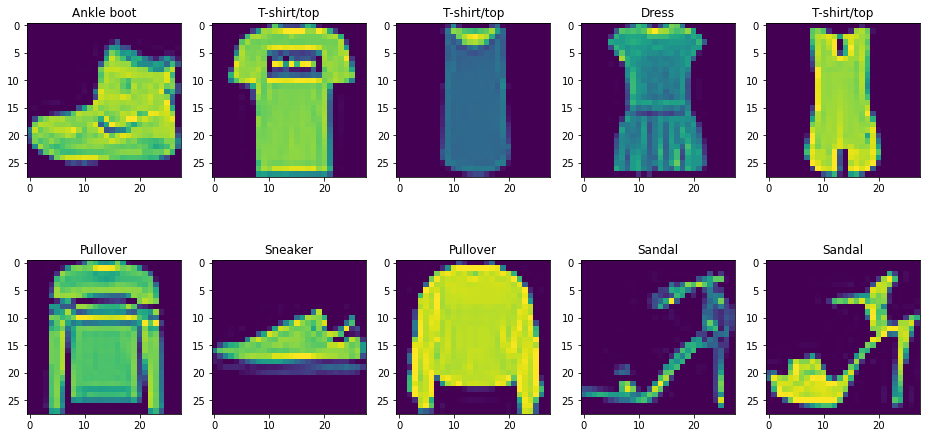

In [116]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
axs = axs.flatten()

for x in range(10):
    axs[x].imshow(X_train[x])
    axs[x].set_title(label_dict[y_train[x]])

plt.show()

In [117]:
input_shape = X_train[0].shape
input_shape

(28, 28)

In [118]:
len(label_dict)

10

## NN

In [119]:
X_train = X_train / 255.
X_test = X_test / 255.

In [120]:
input_shape

(28, 28)

### Training

In [132]:
# Indicates that the model has sequential layers
model = keras.Sequential([
    # Flattens images dimension (input size)
    keras.layers.Flatten(input_shape=input_shape), 

    # creating a fully connected layer 
    # hiper parameter can be tuned
    keras.layers.Dense(256, activation=nn.relu), # all negative values = 0
    
    keras.layers.Dense(128, activation=nn.relu),
    keras.layers.Dense(64, activation=nn.relu),

    # Dropout layers
    keras.layers.Dropout(0.3),

    # output
    keras.layers.Dense(10, activation=nn.softmax) # softmax is for probabilities
])

In [133]:
# Compiles model with optmizer and loss function
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [134]:
metric_values = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5689 - accuracy: 0.8004 - val_loss: 0.4103 - val_accuracy: 0.8517
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4097 - accuracy: 0.8534 - val_loss: 0.3807 - val_accuracy: 0.8608
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3634 - accuracy: 0.8693 - val_loss: 0.3576 - val_accuracy: 0.8662
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3392 - accuracy: 0.8775 - val_loss: 0.3412 - val_accuracy: 0.8780
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3195 - accuracy: 0.8826 - val_loss: 0.3308 - val_accuracy: 0.8804
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3030 - accuracy: 0.8895 - val_loss: 0.3380 - val_accuracy: 0.8774
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2907 - accuracy: 0.8944 - val_loss: 0.3190 - val_accuracy:

### Testing

In [124]:
y_pred = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [125]:
y_pred[0]

array([1.13292500e-10, 4.14018819e-10, 3.41998651e-17, 1.93124284e-11,
       3.28853828e-12, 1.01301998e-08, 1.03257146e-10, 4.14446913e-05,
       9.14817050e-13, 9.99958515e-01], dtype=float32)

In [126]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.5420 - accuracy: 0.8843


### Saving model

In [ ]:
model.save('model.h5')

## Plotting results

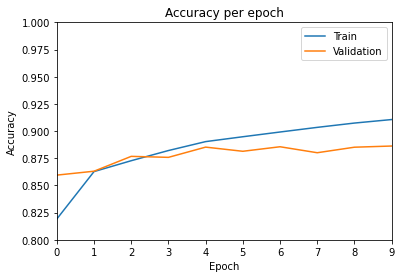

In [130]:
plt.plot(metric_values.history['accuracy'])
plt.plot(metric_values.history['val_accuracy'])
plt.title('Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.ylim(0.8,1)
plt.xlim(0,9)
plt.show()

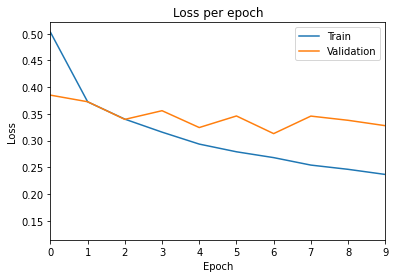

In [131]:
plt.plot(metric_values.history['loss'])
plt.plot(metric_values.history['val_loss'])
plt.title('Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.xlim(0,9)
plt.show()